<center>**RED NEURONAL**<center>

**Red Neuronal:** Las redes neuronales (neural networks) se enmarcan dentro del campo de la Inteligencia Artificial. <br/>
<br/>
<center> **Neurona Artificial:** </center> <div class=text-justify>Las neuronas artificiales se modelan de tal forma que imiten el comportamiento de una neurona cerebral. Tendrán unas ramificaciones y un núcleo o nodo. Habrá ramificaciones de entrada al nodo, que serán las entradas de la neurona, procedentes de otras neuronas. Esta información se procesará en un nodo, y se generará una información de salida que se trasmitirán por las ramificaciones de salida a otras neuronas. Podemos pensar en las conexiones entre neuronas artificiales como en las sinapsis de las neuronas del cerebro. La imagen de una típica neurona artificial es la siguiente.<div>

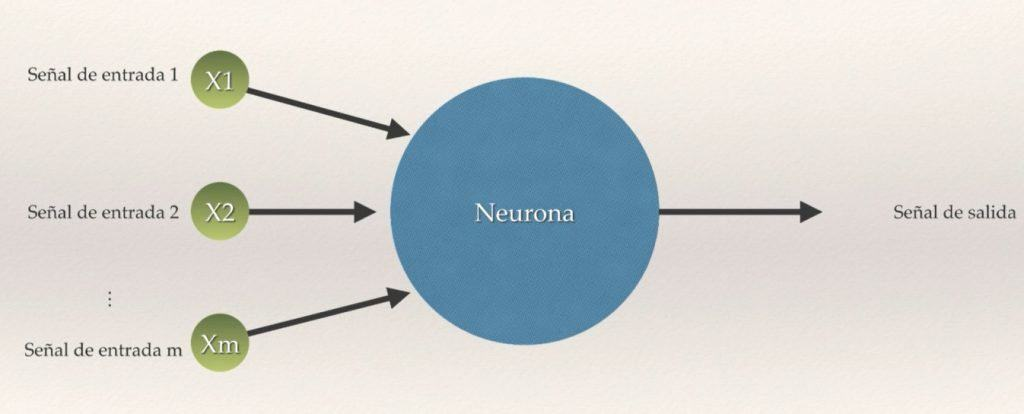

<p>En la siguiente imagen podemos ver algunos modelos de redes neuronales.</p>

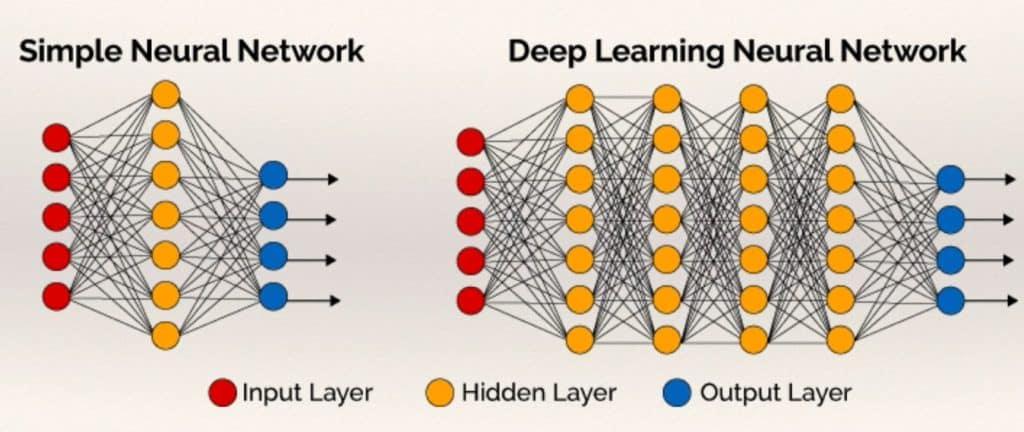

Básicamente, una Red Neuronal comprende los siguientes componentes:<br>

<p>**1**Una capa de entrada que recibe datos y los pasa</p>
<p>**2**Una capa oculta</p>
<p>**3**Una capa de salida</p>
<p>**4**Pesos entre las capas</p>
<p>**5**Una función de activación deliberada para cada capa oculta. En este manual de Python para redes neuronales, vamos a utilizar la función de activación Sigmoide.</p>

<p>Existen varios tipos de redes neuronales. En este ejemplo, vamos a crear una Red Neuronal de retroalimentación o percepción. Este tipo de RN transmite datos directamente de adelante hacia atrás.</p>

<p>El entrenamiento de las neuronas de retroalimentación a menudo necesita propagación hacia atrás, lo que proporciona a la red el conjunto correspondiente de entradas y salidas. Cuando los datos de entrada se transmiten a la neurona, se procesan y se genera una salida.</p>

<center>Desarrollo de una Red Neuronal con el lenguaje de Programación Python.</center>

<p>1.- Creamos la clase NeuralNetwork en Python para entrenar a la neurona y dar una predicción precisa. La clase también tendrá otras funciones auxiliares. </p>

<p>La biblioteca numpy servirá para realizar los cálculos del programa. Esta viene con los siguientes cuatro métodos importantes:<p>

**exp:** para generar el exponencial natural<br>
**array:** para generar una matriz<br>
**dot:** para multiplicar matrices<br>
**random:** para generar números aleatorios. Tenga en cuenta que sembrarán los números aleatorios para garantizar su distribución eficiente.

<p>2.- Utilizamos la función Sigmoide </p>
<p>Vamos a utilizar la función Sigmoide, que dibuja una curva característica en forma de "S", como una función de activación de la red neuronal.</p>
<p>Esta función puede asignar cualquier valor entre de 0 a 1. Nos ayudará a normalizar la suma ponderada de las entradas.</p>

<p>Posteriormente, crearemos una función para calcular la derivada de la función Sigmoide y ayudar a calcular los ajustes esenciales de los pesos.</p>

<p>La salida de una función Sigmoide se puede emplear para generar su derivada. Por ejemplo, si la variable de salida es "x", entonces su derivada será x * (1-x).</p>

<p>3.- Entrenamos el modelo </p>
<p>En esta parte enseñaremos a la red neuronal a hacer una predicción precisa. Cada entrada tendrá un peso, ya sea positivo o negativo.</p>

<p>Esto implica que una entrada que tenga una gran cantidad de peso positivo o una gran cantidad de peso negativo influirá más en la salida resultante.</p>

<p>Recordar que inicialmente comenzamos asignando cada peso a un número aleatorio.</p>

Procedimiento para el proceso de entrenamiento que usamos en esta red neuronal:

**1** Tomamos las entradas del conjunto de datos de entrenamiento, realizamos algunos ajustes basados en sus pesos y los desviamos mediante un método que calculó la salida de la RN.<br>
**2** Calculamos la tasa de error propagada hacia atrás. En este caso, es la diferencia entre la salida prevista de la neurona y la salida esperada del conjunto de datos de entrenamiento.<br>
**3** Según la extensión del error obtenido, realizamos algunos ajustes menores de peso utilizando la fórmula Derivada ponderada por error.<br>
**4** Repetimos este proceso un número arbitrario de 15,000 veces. En cada iteración, todo el conjunto de entrenamiento se procesa simultáneamente.<br>
**5** Utilizamos la función ".T" para transponer la matriz de la posición horizontal a la posición vertical. Por lo tanto, los números se almacenarán de esta manera:<br>

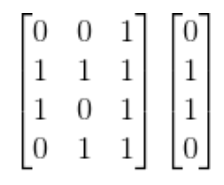<br>

<p>Finalmente, los pesos de la neurona se optimizarán para los datos de entrenamiento proporcionados. En consecuencia, si se hace que la neurona piense en una nueva situación, que es la misma que la anterior, podría hacer una predicción precisa. Así es como tiene lugar la propagación hacia atrás.</p>

In [ ]:
# Importamos la libreria numpy con un alias
import numpy as np

# Definimos nuestra clase principal


class NeuralNetwork():

    # Constructor de la clase
    # Todas las clases en Python tienen que recibir este parametro
    def __init__(self):
        # Utiliamos seed para la generacion de valores randomicos
        np.random.seed(1)

        # Convertimos los pesos a una matriz de 3 por 1 con los valores de -1 a 1
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1

    # Funcion sigmoide
    def sigmoid(self, x):
        # Aplicamos la funcion sigmoide
        return 1 / (1 + np.exp(-x))

    # Derivamos el valor de la funcion sigmoide
    def sigmoid_derivative(self, x):
        # Calculamos la derivada
        return x * (1 - x)

    # Entrenamos a la red neuronal a través de un proceso de prueba y error
    # Se realiza un ajuste de los pesos sinápticos cada vez.
    def train(self, training_inputs, training_outputs, training_iterations):

        # Entrenamos el modelo para hacer predicciones mientras se ajustan los pesos continuamente
        for iteration in range(training_iterations):
            # Pasar el conjunto de entrenamiento a través de nuestra red neuronal (una sola neurona
            output = self.think(training_inputs)

            # Calcular el error(La diferencia entre el resultado deseado y el resultado obtenido
            error = training_outputs - output

            # Multiplica el error por la entrada y nuevamente por el gradiente de la curva Sigmoid
            # Esto significa que los pesos menos confiables se están ajustando más
            # Esto significa que las entradas que son cero, no causan cambios en los pesos.
            adjustments = np.dot(training_inputs.T, error *
                                 self.sigmoid_derivative(output))

            # Ajuste de los pesos
            self.synaptic_weights += adjustments

    # La red neuronal piensa
    def think(self, inputs):
        # Pasar las entradas a través de nuestra red neuronal (una neurona)
        # Convertimos los valores a flotantes

        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output


# Función de entrada
if __name__ == "__main__":

    # Iniciar una red neuronal de una neurona
    neural_network = NeuralNetwork()

    print("Pesos iniciales generados al azar: ")
    print(neural_network.synaptic_weights)

    # El conjunto de pruebas. Tenemos cuatro ejemplos, cada uno consiste en 3 valores de entrada
    # y un valor de salida.
    training_inputs = np.array([[0, 0, 1],
                                [1, 1, 1],
                                [1, 0, 1],
                                [0, 1, 1]])

    training_outputs = np.array([[0, 1, 1, 0]]).T

    # Entrenar la red neuronal utilizando el conjunto de entrenamiento.
    # Realizar 10000 veces y realizar un ajuste más pequeño cada vez.
    neural_network.train(training_inputs, training_outputs, 15000)

    print("Terminamos el proceso de pesos después del entrenamiento: ")
    print(neural_network.synaptic_weights)

    user_input_one = str(input("Entrada #1: "))
    user_input_two = str(input("Entrada #2: "))
    user_input_three = str(input("Entrada #3: "))

    # Prueba la red neuronal con una nueva situación
    print("Consideramos una nueva situación: ", user_input_one,
          user_input_two, user_input_three)
    print("Nueva entrada de datos: ")
    print(neural_network.think(
        np.array([user_input_one, user_input_two, user_input_three])))
    print("Hecho!")


<p>Resultado por consola:</p>

Pesos iniciales generados al azar:<br>
[[-0.16595599]<br>
 [ 0.44064899]<br>
 [-0.99977125]]<br>
Terminamos el proceso de pesos después del entrenamiento: <br>
[[10.08740896]<br>
 [-0.20695366]<br>
 [-4.83757835]]<br>
Entrada #1: 5<br>
Entrada #2: 2<br>
Entrada #3: 1<br>
Consideramos una nueva situación:  5 2 1<br>
Nueva entrada de datos: <br>
[1.]<br>
Hecho!<br>


**CONCLUSIONES**

<p>Se ha logrado crear una Red Neuronal Básica</p>
<p>La neurona comenzó con la asigación de algunos pesos al azar. Posteriormente, se entrenó a sí misma utilizando los ejemplos de entrenamiento.</p>

<p>En consecuencia, si se le presentaba una nueva situación [1,0,0], daba el valor de 0.9999584.</p>

<p>Ojo: La respuesta correcta deseada era 1, entonces, eso está muy cerca, considerando que la función Sigmoide genera valores entre 0 y 1.</p>